# Research on data for presentation

### Finding average work count per JSON file in data warehouse

In [21]:
import os 
import json
from pathlib import Path

# paths to json files, these will be 
mit_blog = Path("/home/sam_glass/iths-data-engineering-group-yolo/data/data_warehouse/mit/articles")
big_data_blog = Path("/home/sam_glass/iths-data-engineering-group-yolo/data/data_warehouse/big_data/articles")


def average_words(blog_path):

    total_word_count = 0 # variables to store the counts
    file_count = 0

    # checking is filename has .json
    for file_path in blog_path.glob("*.json"):
        #print("Processing file:", file_path)
        # contructing full path to the Json file
            
        #read the json file 
        with open(file_path,"r") as json_file:
            data = json.load(json_file)

        # extract the text from the feature "blog_text"
        feature_text = data.get("blog_text", "")

        #split text into words using whitespace as a deliminater
        words = feature_text.split()

        #count the words
        word_count = len(words)

        # add word count to the total 
        total_word_count += word_count

        # increment file count
        file_count += 1

    # calculate average
    if file_count > 0:
        average_word_count = total_word_count / file_count
    else:
        average_word_count = 0

    rounded_average = round(average_word_count)

    print(f"Total word count in {file_count} files, {total_word_count}")
    print(f"Average word count: {average_word_count}")
    print(f"Rounded average word count:{rounded_average}")

## average token (word) count per article MIT blog (input)

In [22]:
average_words(mit_blog)

Total word count in 57 files, 59246
Average word count: 1039.4035087719299
Rounded average word count:1039


## average token (word) count per article Big Data blog (input)

In [23]:
average_words(big_data_blog)

Total word count in 50 files, 45933
Average word count: 918.66
Rounded average word count:919


## Cost of input and output tokens

In [24]:
import pandas as pd

blog_df = pd.DataFrame()

blog_df["input_average_tokens"] = [1000, 1000, 1000, 1000, 1000]
blog_df["input_cost ($)"] = blog_df["input_average_tokens"] * (0.0015/1000)
blog_df["output_average_tokens"] = [300, 400 ,500 , 600, 700 ]
blog_df["output_cost ($)"] = blog_df["output_average_tokens"] * (0.002/1000)
blog_df["Total_cost_one"] = blog_df["input_cost ($)"] + blog_df["output_cost ($)"]
blog_df["Yearly_cost"] = blog_df["Total_cost_one"] * 365
blog_df["Yearly_25_day"] = blog_df["Yearly_cost"] *25
blog_df["Yearly_50_day"] = blog_df["Yearly_cost"] *50
blog_df["Yearly_100_day"] = blog_df["Yearly_cost"] *100


In [25]:
blog_df

,input_average_tokens,input_cost ($),output_average_tokens,output_cost ($),Total_cost_one,Yearly_cost,Yearly_25_day,Yearly_50_day,Yearly_100_day
0,1000,0.0015,300,0.0006,0.0021,0.7665,19.1625,38.325,76.65
1,1000,0.0015,400,0.0008,0.0023,0.8395,20.9875,41.975,83.95
2,1000,0.0015,500,0.0010,0.0025,0.9125,22.8125,45.625,91.25
3,1000,0.0015,600,0.0012,0.0027,0.9855,24.6375,49.275,98.55
4,1000,0.0015,700,0.0014,0.0029,1.0585,26.4625,52.925,105.85



## creating graphs to present

/home/sam_glass/iths-data-engineering-group-yolo/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sam_glass/iths-data-engineering-group-yolo/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sam_glass/iths-data-engineering-group-yolo/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/sam_glass/iths-data-engineering-group-yolo/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: Fut

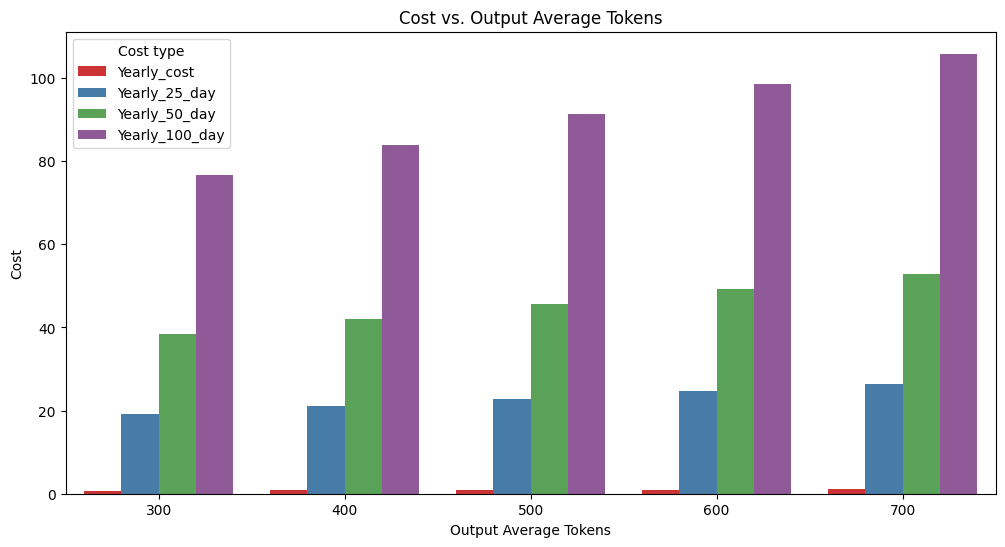

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

melted_df =pd.melt(blog_df, id_vars=["output_average_tokens"],
                    value_vars=["Yearly_cost", "Yearly_25_day", "Yearly_50_day", "Yearly_100_day"],
                    var_name="Cost_type",
                    value_name="Cost")

plt.figure(figsize=(12,6))
sns.barplot(x="output_average_tokens",
            y="Cost",
            hue="Cost_type",
            data=melted_df,
            palette="Set1")

plt.xlabel("Output Average Tokens")
plt.ylabel("Cost")
plt.title("Cost vs. Output Average Tokens")

plt.legend(title="Cost type")

plt.show()
